In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/blackfriday/BlackFriday.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/blackfriday/BlackFriday.csv')

df.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,537577.0,1.002992e+06,1714.392695,1000001.0,1001495.0,1003031.0,1004417.0,1006040.0
Occupation,537577.0,8.082710e+00,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,4.087973e-01,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546e+00,3.750701,1.0,1.0,5.0,8.0,18.0
Product_Category_2,370591.0,9.842144e+00,5.087259,2.0,5.0,9.0,15.0,18.0
Product_Category_3,164278.0,1.266984e+01,4.124341,3.0,9.0,14.0,16.0,18.0
Purchase,537577.0,9.333860e+03,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

df[['Product_Category_2','Product_Category_3']] = imputer.fit_transform(df[['Product_Category_2','Product_Category_3']])

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

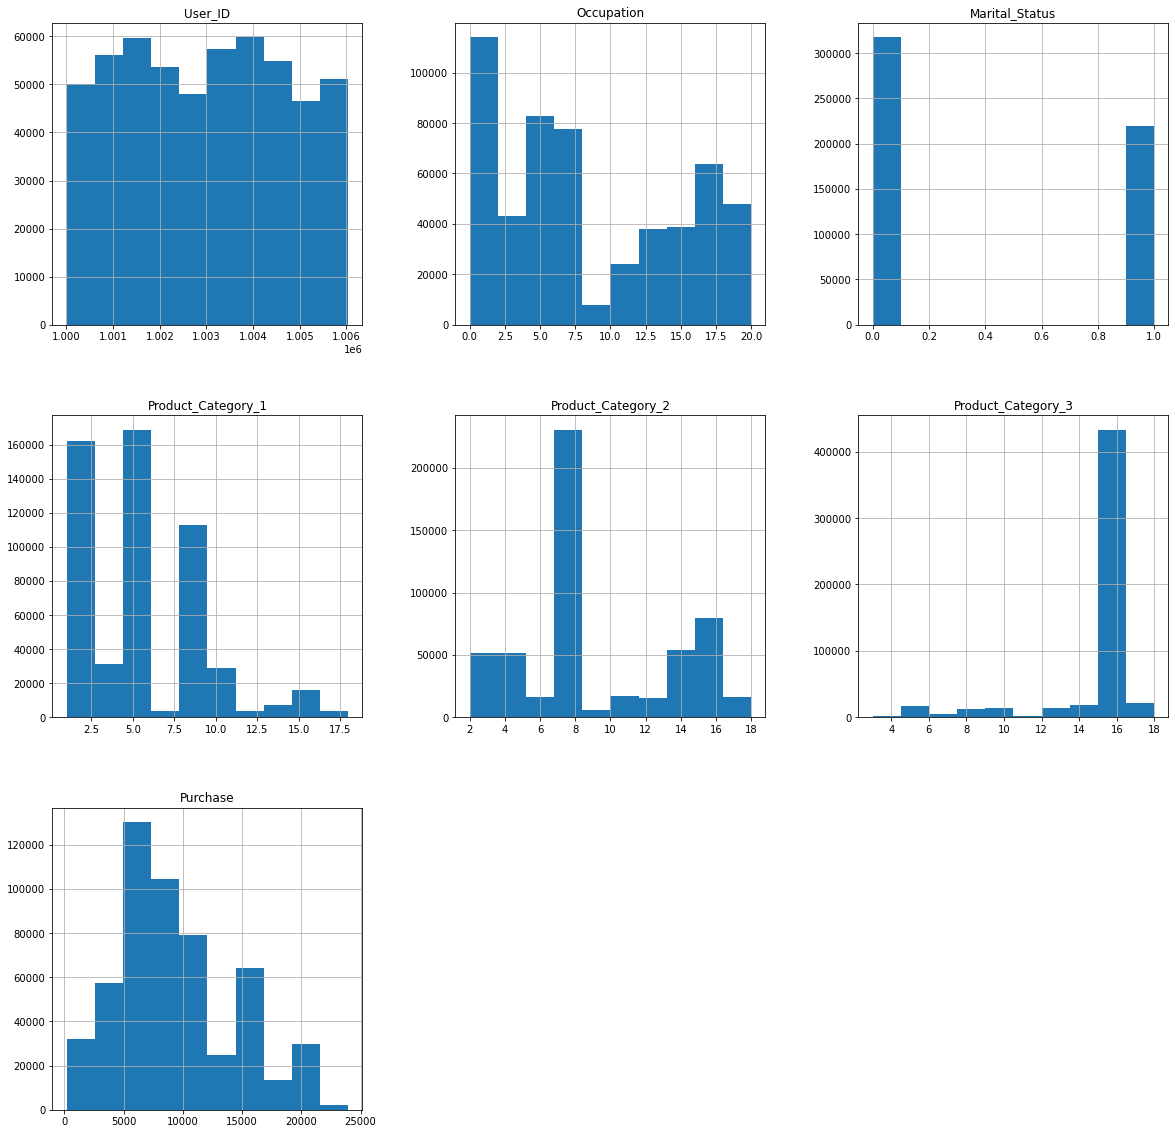

In [61]:
df.hist(figsize=(20,20))

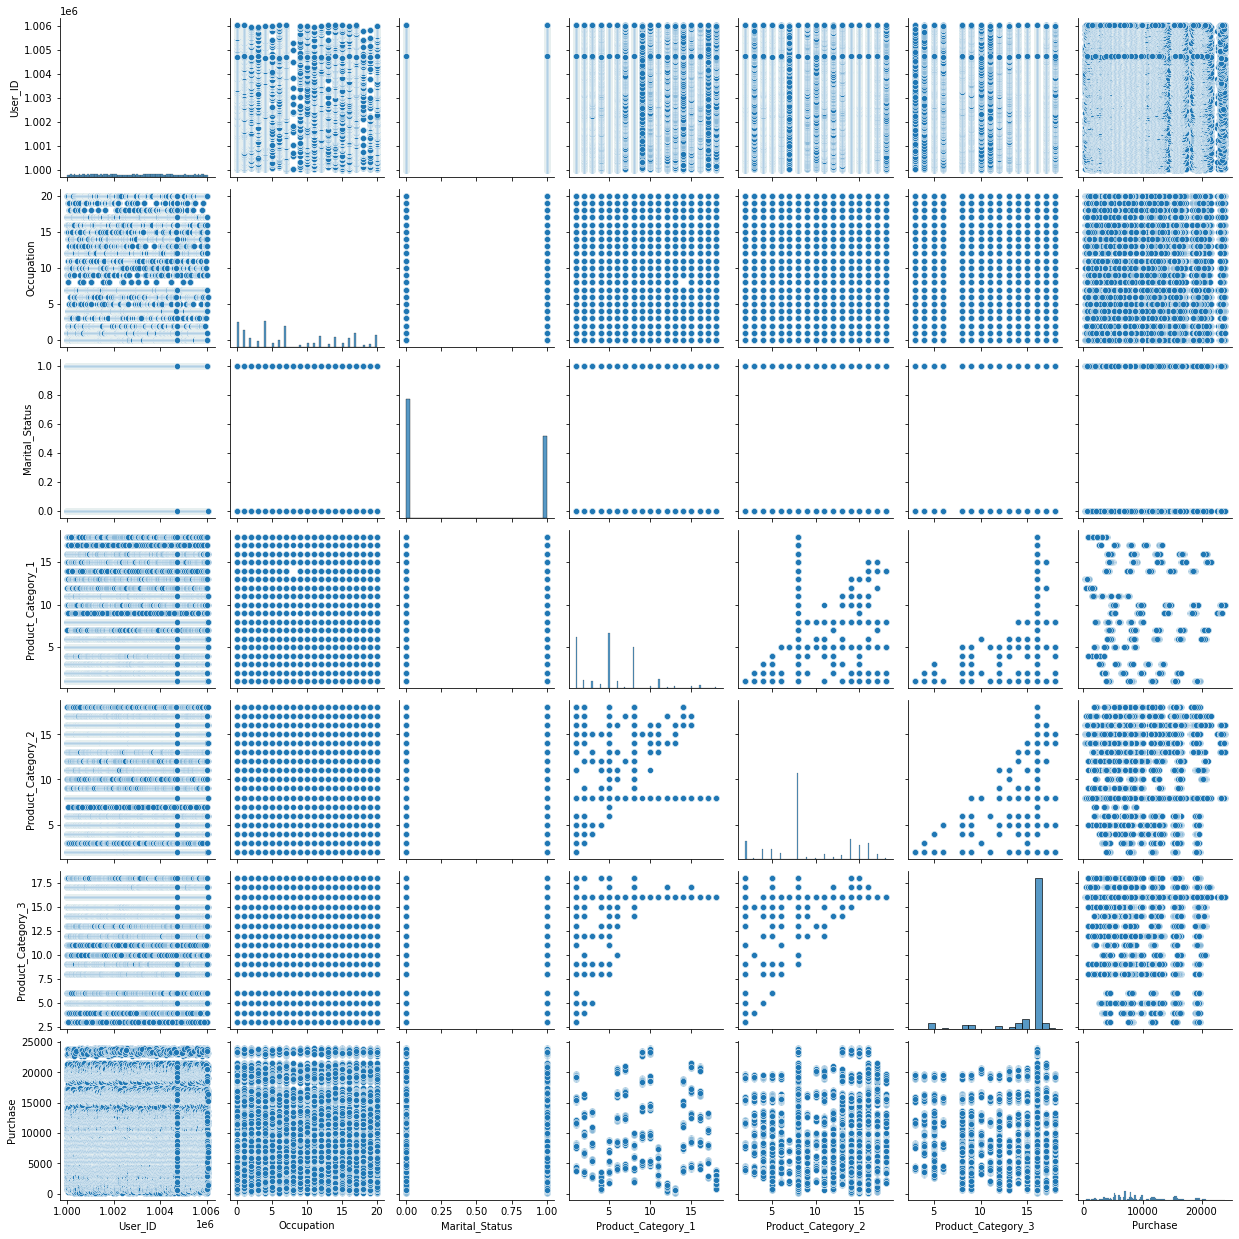

In [18]:
import seaborn as sns 

sns.pairplot(df)

<AxesSubplot:>

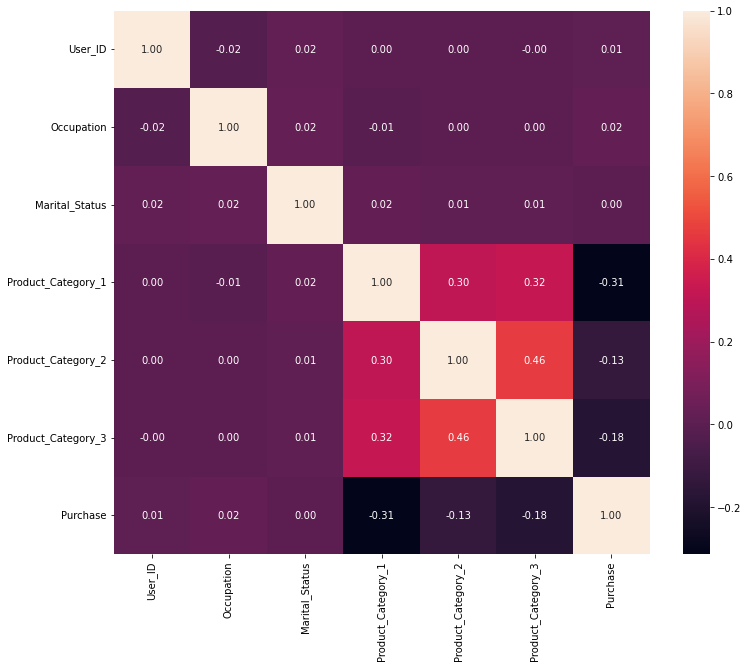

In [17]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, fmt='0.2f')

In [18]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [19]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [20]:
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

x = pd.DataFrame(standard.fit_transform(df.drop(columns = object_cols)), columns = numeric_cols)

x.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.293877,-0.831545,-0.612032,-0.294712,0.370330,-0.193507
1,0.293877,-0.831545,-1.145266,-0.758854,-0.357475,1.177699
2,0.293877,-0.831545,1.787522,-0.294712,0.370330,-1.588402
3,0.293877,-0.831545,1.787522,1.097712,0.370330,-1.661681
4,1.213543,-0.831545,0.721053,-0.294712,0.370330,-0.274012


In [30]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in object_cols :
    x[col] = label.fit_transform(df[col])

x.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,City_Category,Stay_In_Current_City_Years
0,0.293877,-0.831545,-0.612032,-0.294712,0.370330,-0.193507,0,0,0,2
1,0.293877,-0.831545,-1.145266,-0.758854,-0.357475,1.177699,0,0,0,2
2,0.293877,-0.831545,1.787522,-0.294712,0.370330,-1.588402,0,0,0,2
3,0.293877,-0.831545,1.787522,1.097712,0.370330,-1.661681,0,0,0,2
4,1.213543,-0.831545,0.721053,-0.294712,0.370330,-0.274012,1,6,2,4


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Occupation                  537577 non-null  float64
 1   Marital_Status              537577 non-null  float64
 2   Product_Category_1          537577 non-null  float64
 3   Product_Category_2          537577 non-null  float64
 4   Product_Category_3          537577 non-null  float64
 5   Purchase                    537577 non-null  float64
 6   Gender                      537577 non-null  int64  
 7   Age                         537577 non-null  int64  
 8   City_Category               537577 non-null  int64  
 9   Stay_In_Current_City_Years  537577 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 41.0 MB


In [34]:
x.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,City_Category,Stay_In_Current_City_Years
count,5.375770e+05,5.375770e+05,5.375770e+05,5.375770e+05,5.375770e+05,5.375770e+05,537577.000000,537577.000000,537577.000000,537577.000000
mean,-1.025678e-16,-1.016691e-16,1.232400e-16,8.917851e-17,-2.183796e-16,-1.618880e-16,0.754087,2.494755,1.040567,1.859458
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.430627,1.352583,0.759627,1.289828
min,-1.238898e+00,-8.315450e-01,-1.145266e+00,-1.687137e+00,-4.360401e+00,-1.836745e+00,0.000000,0.000000,0.000000,0.000000
25%,-9.323427e-01,-8.315450e-01,-1.145266e+00,-2.947123e-01,3.703298e-01,-6.962152e-01,1.000000,2.000000,0.000000,1.000000
50%,-1.659551e-01,-8.315450e-01,-7.879774e-02,-2.947123e-01,3.703298e-01,-2.553414e-01,1.000000,2.000000,1.000000,2.000000
75%,9.069876e-01,1.202581e+00,7.210535e-01,1.097712e+00,3.703298e-01,5.499158e-01,1.000000,3.000000,2.000000,3.000000
max,1.826653e+00,1.202581e+00,3.387224e+00,2.025996e+00,1.098134e+00,2.936577e+00,1.000000,6.000000,2.000000,4.000000


In [42]:
y = standard.fit_transform(df['Purchase'].array.reshape(-1,1))

In [51]:
y = y.reshape(-1,).astype(int)

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [53]:
# This iteration takes too long in my cpu ㅜㅜㅜㅜㅜ
# Just one iteration will have to do in my next block
# from sklearn.neighbors import KNeighborsClassifier

# test_scores = []
# train_scores = []

# # run 15 iterations of KNN classifier
# for i in range(1,15):

#     knn = KNeighborsClassifier(i)
#     knn.fit(x_train,y_train)
    
#     train_scores.append(knn.score(x_train,y_train))
#     test_scores.append(knn.score(x_test,y_test))

KeyboardInterrupt: 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = list()
train_scores = list()

knn = KNeighborsClassifier(i)
knn.fit(x_train,y_train)
    
train_scores.append(knn.score(x_train,y_train))
test_scores.append(knn.score(x_test,y_test))

In [55]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 96.33703125835638 % and k = [1]


In [56]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 94.47059042375089 % and k = [1]


## Result Visualization

Text(0.5, 15.0, 'Predicted label')

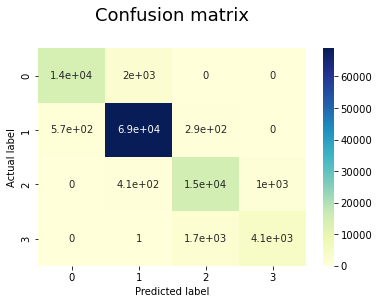

In [60]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 15.0, 'Predicted label')

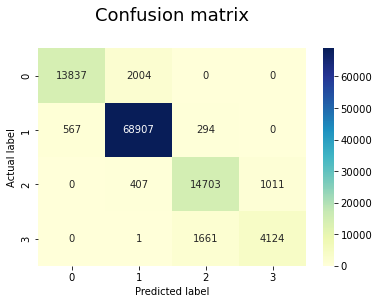

In [64]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize=18)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

          -1       0.96      0.87      0.91     15841
           0       0.97      0.99      0.98     69768
           1       0.88      0.91      0.90     16121
           2       0.80      0.71      0.76      5786

    accuracy                           0.94    107516
   macro avg       0.90      0.87      0.89    107516
weighted avg       0.94      0.94      0.94    107516

